# Data Plotting Notebook

This notebook provides a collection of examples demonstrating how to plot and analyze data based on different scopes, group data by site, and aggregate datasets. The examples cover various scenarios and use cases, which are useful for understanding and visualizing large datasets. The data .json file is produced by running `dcm_scopes_info.py` at https://github.com/DUNE/data-mgmt-ops/blob/master/data-collections-manager/dcm_scopes_info.py


In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [2]:
df = pd.read_json('dune_all_scopes_08_21_24.json')

In [3]:
df

,scope,dataset,status,catalog,did,did_type,site,created_at,updated_at,size,n_files
0,protodune-sp,np04_raw_run_number_1202,OK,rucio,7d9495ff5d3f4eff8cc070e9bf56a3f9,DATASET,FNAL_DCACHE,2018-11-14 16:55:47,2018-11-14 16:55:47,0.384165,4
1,protodune-sp,np04_raw_run_number_4577,OK,rucio,64fbff58b722440792d0ba7d73fa23d0,DATASET,FNAL_DCACHE,2018-11-14 18:39:21,2018-11-14 18:39:21,277.169244,36
2,protodune-sp,np04_raw_run_number_1206,OK,rucio,6013127ed3b34e4e8c6d5fb74b085a12,DATASET,FNAL_DCACHE,2018-11-14 16:55:50,2018-11-14 16:55:51,33.392704,8
3,protodune-sp,np04_raw_run_number_26,OK,rucio,1a754d92ba2f48ad858cf9063dedcede,DATASET,CERN_PDUNE_CASTOR,2018-11-13 19:21:20,2018-11-13 19:21:20,0.000954,1
4,protodune-sp,np04_raw_run_number_4583,OK,rucio,3d3397cc33b64c81a4ce8f3f06363dc2,DATASET,FNAL_DCACHE,2018-11-14 18:39:29,2018-11-14 18:39:29,26.645142,22
...,...,...,...,...,...,...,...,...,...,...,...
77479,hd-protodune-det-reco,hd-protodune_reconstruction_keepup_20240817_se...,REPLICATING,rucio,3cd176b3bdff47c891eb607bcfc30a46,DATASET,DUNE_US_FNAL_DISK_STAGE,2024-08-20 15:13:48,2024-08-21 09:14:07,3656.138725,4607
77480,hd-protodune-det-reco,w2880s1p2-DUNE_UK_MANCHESTER_CEPH,OK,rucio,a7f09a83aa0c42be90bf2db12129adbe,DATASET,DUNE_UK_MANCHESTER_CEPH,2024-08-20 18:19:31,2024-08-20 18:19:31,0.000000,0
77481,hd-protodune-det-reco,w2880s1p2-PRAGUE,OK,rucio,19848796190a44ac9f87efd8754e0db2,DATASET,PRAGUE,2024-08-20 18:19:18,2024-08-20 21:55:43,7.050736,248
77482,hd-protodune-det-reco,hd-protodune_reconstruction_keepup_ntuples_202...,OK,rucio,582b7f4bca4549e894785b979dce232c,DATASET,DUNE_US_FNAL_DISK_STAGE,2024-08-13 23:22:10,2024-08-16 20:19:57,114.856516,4108


In [4]:
grouped_by_scopes = df.groupby('scope')['size'].sum().reset_index()

In [5]:
grouped_by_scopes = grouped_by_scopes.sort_values(by=['size'], ascending=False).reset_index(drop=True)

In [6]:
grouped_by_scopes

,scope,size
0,hd-protodune,1.368489e+07
1,protodune-sp,9.784147e+06
2,pdsp_mc_reco,1.743838e+06
3,protodune-dp,1.435889e+06
4,fd_vd_mc_reco,1.282230e+06
5,fardet-hd,1.202831e+06
6,np04_reco_keepup,1.044244e+06
7,vd-coldbox-top,1.024575e+06
8,fardet-vd,6.408923e+05
9,hd-protodune-det-reco,5.565284e+05


## Scopes
This section demonstrates how to plot data based for all official scopes

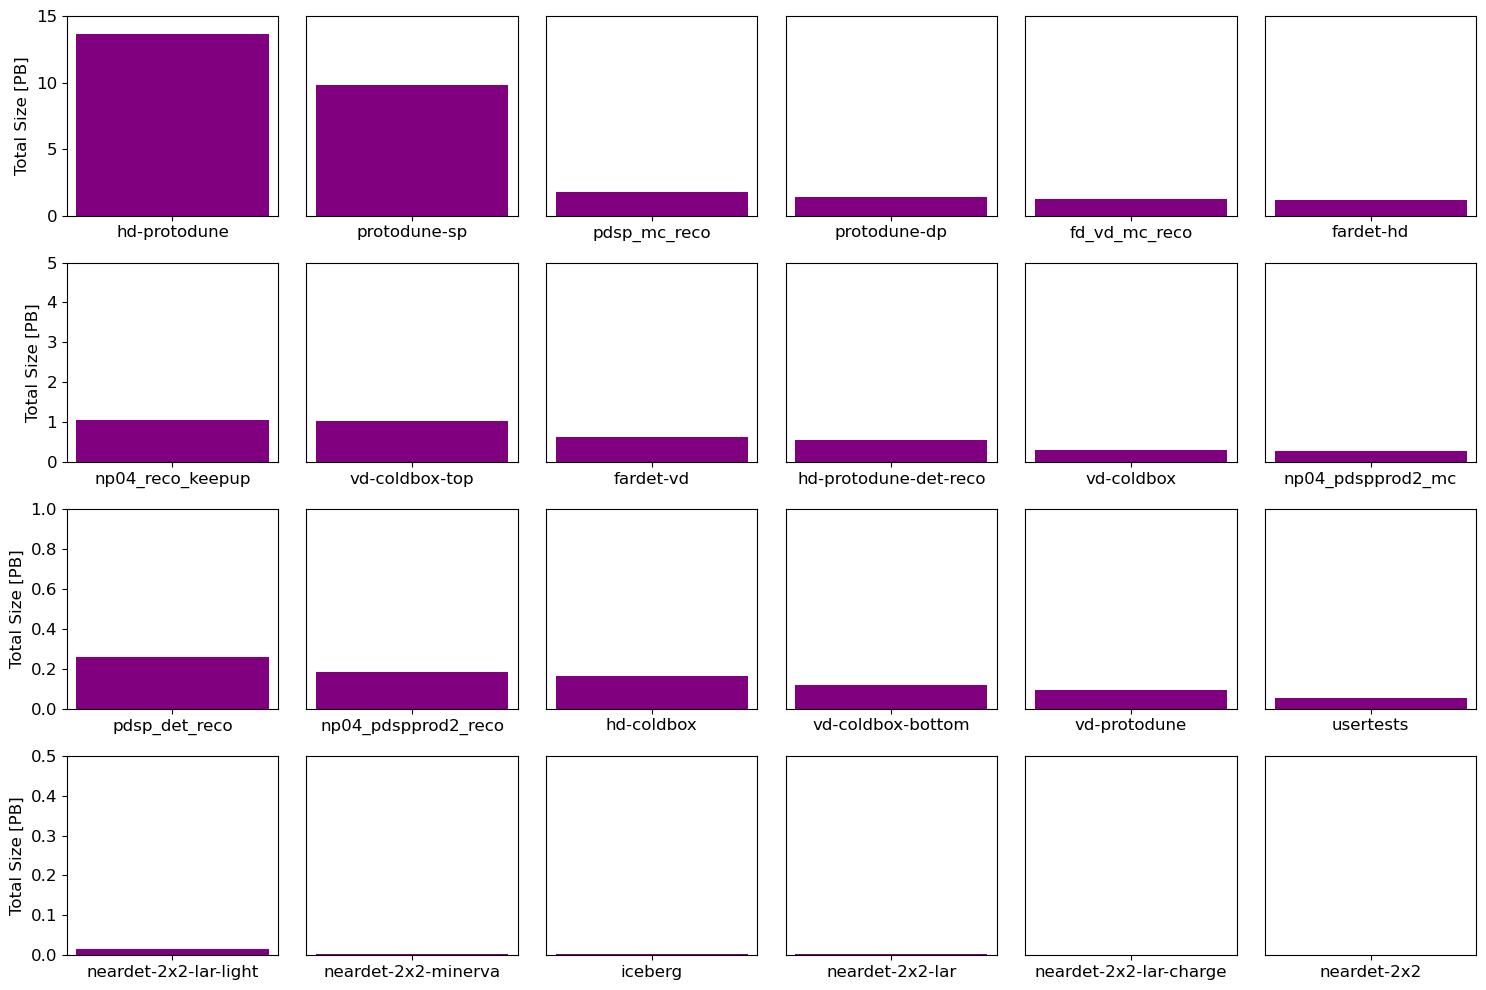

In [7]:
# Extract sorted scopes and sizes
sorted_scopes = grouped_by_scopes['scope'].tolist()
sorted_sizes = grouped_by_scopes['size'].tolist()

# Determine the number of rows and columns for the subplot grid
n_rows = 4
n_cols = 6

# Define y-limits for each row
y_limits = [(0, 15), (0, 5), (0, 1), (0, 0.5), (0, 0.01)]  # Adjust these values as needed

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through sorted scopes and sizes to create individual bar plots
for i, ax in enumerate(axes):
    row_idx = i // n_cols  # Determine the row index
    if i < len(sorted_scopes):
        ax.bar(sorted_scopes[i], sorted_sizes[i]/1.0e6, color='purple')
        #ax.set_title(sorted_scopes[i], fontsize=12)
        ax.set_ylim(y_limits[row_idx])  # Set the y-limit based on the row index
        if i % n_cols == 0:  # Check if it's the first column
            ax.set_ylabel("Total Size [PB]", fontsize=12)
            ax.tick_params(axis='y', labelsize=12)  # Keep y-tick labels
        else:
            ax.set_yticklabels([])  # Hide y-tick labels for other columns
            ax.set_yticks([])  # Hide y-tick marks for other columns
        ax.tick_params(axis='x', labelsize=12)  # Rotate and reduce the size of x-axis labels
    else:
        ax.axis('off')  # Hide any unused subplots

plt.tight_layout()
plt.savefig('plots/dune_scopes_08_21_2024.png')
plt.show()  

## Analyze individual scopes as needed
This section demonstrates how to filter data based on specific scope and datasets

In [8]:
hd_protodune = df[df['scope'] == 'hd-protodune']

In [9]:
hd_protodune

,scope,dataset,status,catalog,did,did_type,site,created_at,updated_at,size,n_files
58887,hd-protodune,hd-protodune_27517,OK,rucio,e68286fe17614840a8d29bb8f48af8ad,DATASET,FNAL_DCACHE,2024-06-28 08:16:08,2024-06-28 08:22:37,9.920998,3
58888,hd-protodune,hd-protodune_27519,OK,rucio,b96954ed79b8408c8e2528782bc46499,DATASET,FNAL_DCACHE,2024-06-28 08:20:17,2024-06-28 08:22:36,9.931373,3
58889,hd-protodune,hd-protodune_27518,OK,rucio,99655c8966a448208913711a20bc17b8,DATASET,FNAL_DCACHE,2024-06-28 08:18:11,2024-06-28 08:22:36,9.924456,3
58890,hd-protodune,hd-protodune_27520,OK,rucio,e5a74b55b26a4eea9ef489a491ae86df,DATASET,FNAL_DCACHE,2024-06-28 08:22:26,2024-06-28 08:27:39,9.818367,3
58891,hd-protodune,hd-protodune_27539,OK,rucio,44ff0cf3b33248efa47e835f2906e12b,DATASET,DUNE_US_BNL_SDCC,2024-08-14 13:48:21,2024-08-16 08:14:14,9.925606,3
...,...,...,...,...,...,...,...,...,...,...,...
67280,hd-protodune,hd-protodune_28680,OK,rucio,1b0f00f869a247488d2cee341edce026,DATASET,FNAL_DCACHE,2024-08-14 07:20:55,2024-08-14 08:06:23,127.010068,35
67281,hd-protodune,hd-protodune_28678,OK,rucio,ed56f0b1b7b94153ab8f7dc41e2eaa61,DATASET,FNAL_DCACHE,2024-08-14 06:43:19,2024-08-14 08:06:19,2195.107229,525
67282,hd-protodune,hd-protodune_28679,OK,rucio,80638defdb644e7a831524e293969170,DATASET,DUNE_CERN_EOS,2024-08-14 07:22:50,2024-08-14 07:23:12,2.312981,8
67283,hd-protodune,hd-protodune_28679,OK,rucio,9e66ccb8ea32421294247860b0c4bf4f,DATASET,CERN_PDUNE_CASTOR,2024-08-14 07:22:50,2024-08-14 07:54:14,2.312981,8


/var/folders/s8/l89dbm6s72x1b7stbxlj2f6c0000gn/T/ipykernel_78749/1749461505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd_protodune['percentage'] = (hd_protodune['size'] / total_size) * 100


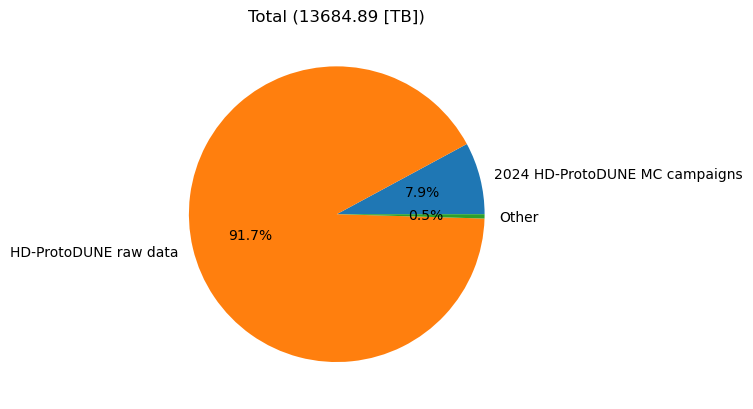

In [10]:
# Group by dataset
total_size = round(hd_protodune['size'].sum()/1.0e3,2)

hd_protodune['percentage'] = (hd_protodune['size'] / total_size) * 100

# Filter the DataFrame to only include rows where the 'dataset' contains 'pdhd_1gev_beam_cosmics_official'
# These are the most recent datasets according to the official data inventory
filtered_df_MC = hd_protodune[hd_protodune['dataset'].str.contains('pdhd_1gev_beam_cosmics_official')]
# Create another DataFrame with the entries that do match the filter for raw data
filtered_df_raw = hd_protodune[hd_protodune['dataset'].str.contains('hd-protodune')]

filtered_df_other = hd_protodune[
    ~hd_protodune['dataset'].str.contains('pdhd_1gev_beam_cosmics_official') &
    ~hd_protodune['dataset'].str.contains('hd-protodune')
]

filtered_df_MC_sum = filtered_df_MC.sum(numeric_only=True)
filtered_df_raw_sum = filtered_df_raw.sum(numeric_only=True)
filtered_df_other_sum = filtered_df_other.sum(numeric_only=True)
concatenated_df = pd.concat([filtered_df_MC_sum, filtered_df_raw_sum, filtered_df_other_sum])

# Generate a pie chart
labels =['2024 HD-ProtoDUNE MC campaigns','HD-ProtoDUNE raw data', 'Other']
plt.title(f'Total ({total_size} [TB])')
plt.pie(concatenated_df['percentage'], labels=labels, autopct='%1.1f%%', startangle=0)
plt.savefig('plots/hd-protodune_scope.png')
plt.show()

In [11]:
#Now filter the data by RSE
group_rse_1 = filtered_df_raw.groupby(['site'])['size'].sum().reset_index()
group_rse_2 = filtered_df_MC.groupby(['site'])['size'].sum().reset_index()

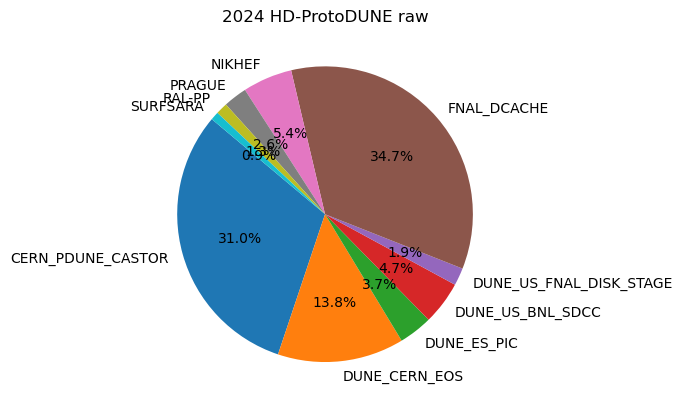

In [12]:
plt.title(f'2024 HD-ProtoDUNE raw')

plt.pie(group_rse_1['size'], labels=group_rse_1['site'], autopct='%1.1f%%', startangle=140)
plt.savefig("plots/raw_distribution_HD_protodune.png")
plt.show()

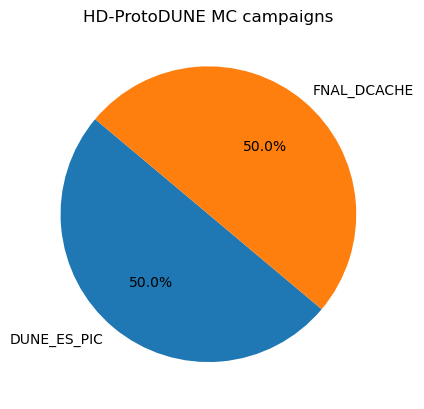

In [13]:
plt.title(f'HD-ProtoDUNE MC campaigns')

plt.pie(group_rse_2['size'], labels=group_rse_2['site'], autopct='%1.1f%%', startangle=140)
plt.savefig("plots/mc_hd_protodune.png")
plt.show()

In [14]:
hd_fd = df[df['scope'] == 'fardet-hd']

/var/folders/s8/l89dbm6s72x1b7stbxlj2f6c0000gn/T/ipykernel_78749/894013279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd_fd['percentage'] = (hd_fd['size'] / total_size) * 100


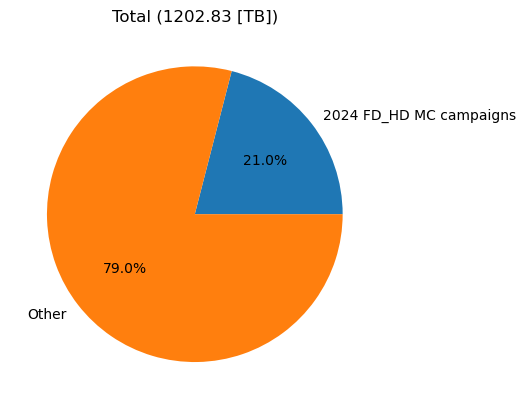

In [15]:
# Group by dataset
total_size = round(hd_fd['size'].sum()/1.0e3,2)

hd_fd['percentage'] = (hd_fd['size'] / total_size) * 100

# These are the most recent datasets according to the official data inventory
filtered_df = hd_fd[hd_fd['dataset'].str.contains('_ritm1780305')]

# Create another DataFrame with the entries that do not match the filter
non_filtered_df = hd_fd[~hd_fd['dataset'].str.contains('_ritm1780305')]

filtered_df_sum = filtered_df.sum(numeric_only=True)
non_filtered_df_sum = non_filtered_df.sum(numeric_only=True)

concatenated_df = pd.concat([filtered_df_sum, non_filtered_df_sum])

# Generate a pie chart
labels =['2024 FD_HD MC campaigns',"Other"]
plt.title(f'Total ({total_size} [TB])')
plt.pie(concatenated_df['percentage'], labels=labels, autopct='%1.1f%%', startangle=0)
plt.savefig('plots/FD_HD_scope.png')
plt.show()

In [16]:
#Now filter the data by RSE
group_rse_1 = filtered_df.groupby(['site'])['size'].sum().reset_index()
group_rse_2 = non_filtered_df.groupby(['site'])['size'].sum().reset_index()

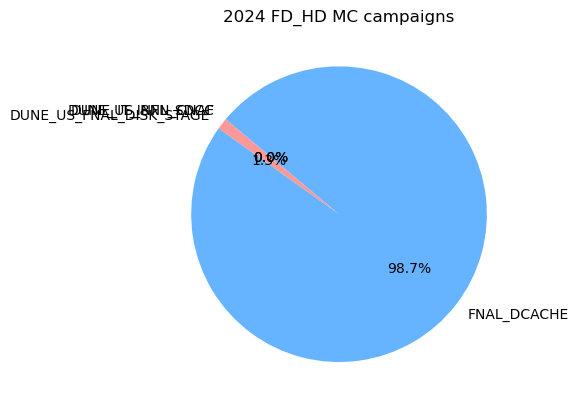

In [17]:
plt.title(f'2024 FD_HD MC campaigns')

plt.pie(group_rse_1['size'], labels=group_rse_1['site'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.savefig("plots/MC_2024_fd_HD.png")
plt.show()

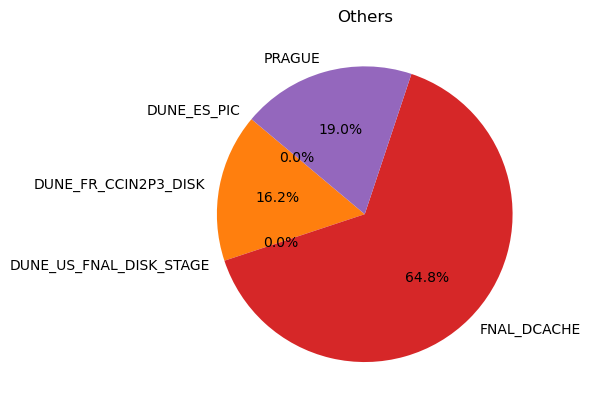

In [18]:
plt.title(f'Others')
plt.pie(group_rse_2['size'], labels=group_rse_2['site'], autopct='%1.1f%%', startangle=140)
plt.savefig("plots/fd_HD_old_stuff.png")
plt.show()

In [19]:
vd_fd = df[df['scope'] == 'fardet-vd']

/var/folders/s8/l89dbm6s72x1b7stbxlj2f6c0000gn/T/ipykernel_78749/1226752849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vd_fd['percentage'] = (vd_fd['size'] / total_size) * 100


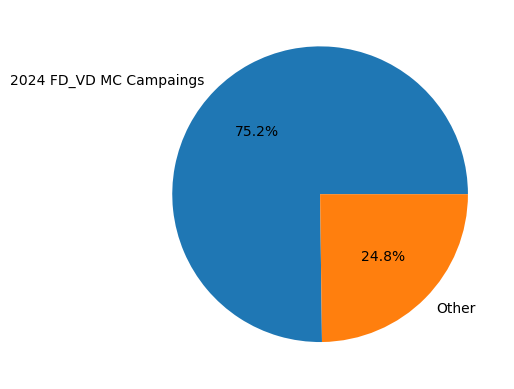

In [20]:
# Group by dataset
total_size = round(vd_fd['size'].sum()/1.0e3,2)

vd_fd['percentage'] = (vd_fd['size'] / total_size) * 100

# These are the most recent datasets according to the official data inventory
filtered_df = vd_fd[vd_fd['dataset'].str.contains('_ritm1780305')]

# Create another DataFrame with the entries that do not match the filter
non_filtered_df = vd_fd[~vd_fd['dataset'].str.contains('_ritm1780305')]

filtered_df_sum = filtered_df.sum(numeric_only=True)
non_filtered_df_sum = non_filtered_df.sum(numeric_only=True)

concatenated_df = pd.concat([filtered_df_sum, non_filtered_df_sum])

labels =['2024 FD_VD MC Campaings',"Other"]
plt.pie(concatenated_df['percentage'], labels=labels, autopct='%1.1f%%', startangle=0)
plt.savefig('plots/FD_VD_scope.png')
plt.show()

In [21]:
#Now filter the data by RSE
group_rse_1 = filtered_df.groupby(['site'])['size'].sum().reset_index()
group_rse_2 = non_filtered_df.groupby(['site'])['size'].sum().reset_index()

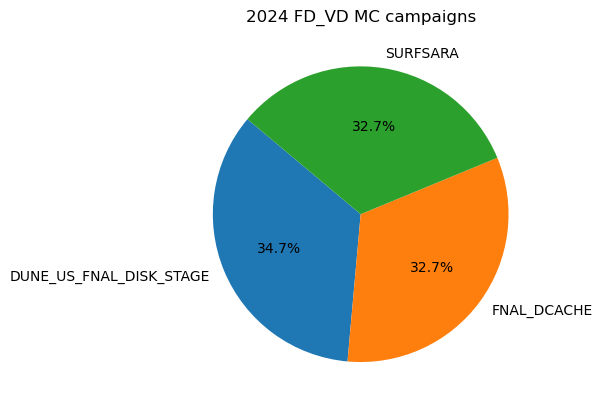

In [22]:
plt.title(f'2024 FD_VD MC campaigns')

plt.pie(group_rse_1['size'], labels=group_rse_1['site'], autopct='%1.1f%%', startangle=140)
plt.savefig("plots/FD_VD_MC_2024.png")
plt.show()

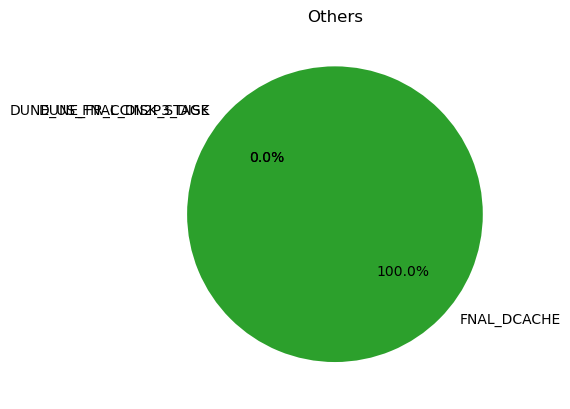

In [23]:
plt.title(f'Others')
plt.pie(group_rse_2['size'], labels=group_rse_2['site'], autopct='%1.1f%%', startangle=140)
plt.savefig("plots/MC_FD_VD_old_stuff.png")
plt.show()